In [1]:
# -*- coding:utf-8 -*-
# @Author: Niccolò Bonacchi
# @Date: Thursday, February 21st 2019, 7:13:37 pm
# @Last Modified by: Niccolò Bonacchi
# @Last Modified time: 21-02-2019 07:35:12.1212

In [2]:
from pathlib import Path
import ibllib.io.raw_data_loaders as raw
import matplotlib.pyplot as plt
import numpy as np
import sys
import pandas as pd


def get_port_events(events: dict, name: str = '') -> list:
    out: list = []
    for k in events:
        if name in k:
            out.extend(events[k])
    out = sorted(out)

    return out
session_path = r'Z:\moraogando\IBLdata\Box1_basement\_iblrig_test_mouse\2022-10-20\001//'

#local test mouse path: r'C:\iblrig_data\Subjects\_iblrig_test_mouse\2022-09-31\004//'
#synapse path: r'Z:\moraogando\IBLdata\Box1_basement\MBOT42_1840\2022-08-23\002//'
#local path:  r'C:\iblrig_data\Subjects\MBOT42_1840\2022-08-19\005//'


Found 0 trials with bad sync data for Box 1


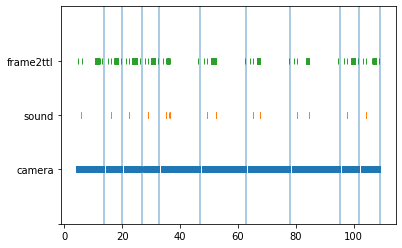

In [3]:
session_data_file = Path(session_path) #getting path to session folder
if not session_data_file.exists():  #check if the directory (folder) exists
    raise (FileNotFoundError)
data = raw.load_data(session_data_file) #trial-wise list of dictionaries containing info from each trial
unsynced_trial_count = 0 #setting initial unsynced trial count to 0
frame2ttl = [] #empty list, which we will add to the times when a frametottl signal is sent
sound = [] #empty list, which we will add to the times when a sound signal is sent
camera = [] #empty list, which we will add to the times when a camera signal is sent
trial_end = [] #empty list, which we will add to the times when a trial ends
trial_start = []
for trial_data in data: #for loop: for every trial, get the port events of bnc1, bnc2, port1.  if no event recorded in any of these ports, report an unsynced trial
    tevents = trial_data['behavior_data']['Events timestamps']
    ev_bnc1 = get_port_events(tevents, name='BNC1')
    ev_bnc2 = get_port_events(tevents, name='BNC2')
    ev_port1 = get_port_events(tevents, name='Port1')
    if not ev_bnc1 or not ev_bnc2 or not ev_port1:
        unsynced_trial_count += 1
    frame2ttl.extend(ev_bnc1)
    sound.extend(ev_bnc2)
    camera.extend(ev_port1)
    trial_end.append(trial_data['behavior_data']['Trial end timestamp'])
    trial_start.append(trial_data['behavior_data']['Trial start timestamp'])
print(f'Found {unsynced_trial_count} trials with bad sync data for Box 1')

f = plt.figure()  #figsize=(19.2, 10.8), dpi=100)
ax = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

ax.plot(camera, np.ones(len(camera)) * 1, '|')
ax.plot(sound, np.ones(len(sound)) * 2, '|')
ax.plot(frame2ttl, np.ones(len(frame2ttl)) * 3, '|')
[ax.axvline(t, alpha=0.5) for t in trial_end]
ax.set_ylim([0, 4])
ax.set_yticks(range(4))
ax.set_yticklabels(['', 'camera', 'sound', 'frame2ttl'])
plt.show() #this plots the bpod times and whether a signal was received at that time by the frame2ttl, sound, and camera

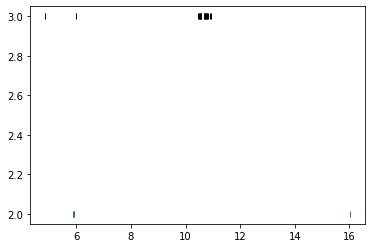

In [4]:
ax = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

# ax.plot(camera[:20], np.ones(len(camera[:20])) * 1, '|')
ax.plot(sound[:5], np.ones(len(sound[:5])) * 2, '|')
ax.plot(frame2ttl[:20], np.ones(len(frame2ttl[:20])) * 3, '|',color='black')
# [ax.axvline(t, alpha=0.5) for t in trial_end]
# ax.set_ylim([0, 4])
# ax.set_yticks(range(4))
# ax.set_yticklabels(['', 'camera', 'sound', 'frame2ttl'])
plt.show() #this plots the bpod times and whether a signal was received at that time by the frame2ttl, sound, and camera

In [24]:
np.random.choice([0,1])

0

In [23]:

data[0]['behavior_data']['States timestamps']

{'trial_start': [[0.0, 4.0321]],
 'reset_rotary_encoder': [[4.0321, 4.0322000000000005]],
 'quiescent_period': [[4.0322000000000005, 4.790900000000001]],
 'stim_on': [[4.790900000000001, 4.867500000000001]],
 'interactive_delay': [[4.867500000000001, 5.867500000000001]],
 'play_tone': [[5.867500000000001, 5.8854]],
 'reset2_rotary_encoder': [[5.8854, 5.8854999999999995]],
 'closed_loop': [[5.8854999999999995, 12.113100000000003]],
 'freeze_reward': [[12.113100000000003, 12.113200000000003]],
 'reward': [[12.113200000000003, 12.183200000000003]],
 'correct': [[12.183200000000003, 13.113200000000003]],
 'hide_stim': [[13.113200000000003, 13.167300000000001]],
 'exit_state': [[13.167300000000001, 13.667300000000001]],
 'no_go': [[nan, nan]],
 'freeze_error': [[nan, nan]],
 'error': [[nan, nan]]}

In [6]:
#This creates a list of trial-wise lists for Closed Loop period timestamps
ClosedLoopTimesList = []

for  i, d in enumerate(data):
    ClosedLoop = d['behavior_data']['States timestamps']['closed_loop'][0]
    
    ClosedLoopTimesList.append(ClosedLoop)

In [7]:
#This creates a list of trial-wise lists for Frame to TTL timestamps
FtoTTLTimesList = []

for  i, d in enumerate(data):
    tevents = d['behavior_data']['Events timestamps']
    trialnum =i+1
    FtoTTL = np.array(get_port_events(tevents, name='BNC1'))
    
    FtoTTLTimesList.append(FtoTTL)

In [8]:
#This creates a list of trial-wise lists for Sound timestamps
SoundTimesList = []

for  i, d in enumerate(data):
    tevents = d['behavior_data']['Events timestamps']
    trialnum =i+1
    Sound = np.array(get_port_events(tevents, name='BNC2'))
    
    SoundTimesList.append(Sound)

In [9]:
# This for loop creates a framewise list of trial numbers and creates a list of each frame time stamp
trialNumList = []
camTimesList = []

for  i, d in enumerate(data):
    tevents = d['behavior_data']['Events timestamps']
    trialnum =i+1
    camera= np.array(get_port_events(tevents, name='Port1'))
    framesthistrial = len(camera)
    
    trialNumList.append([trialnum ]*framesthistrial)
    camTimesList.append(camera)

camTimesListofLists = [l.tolist() for l in camTimesList]

In [10]:
# This method flatten a 2D+ List/Array into a 1D List with only the first element of the List/Array,
# >>> a = [1,[2,2,3,4],2,[3,3]]
# >>> list(firsty(a))
# [1, 2, 2, 3]

from collections.abc import Iterable
def firsty(lis):
     return [item[0] for item in lis]
    
FtoTTLTimesList1D = firsty(FtoTTLTimesList)
SoundTimesList1D = firsty(SoundTimesList)
trialNumListCount = [len(x) for x in trialNumList]

#This method creates a list of all of the signal times repeated for however many frames there are in each trial
from collections import Counter
FtoTTLTimesByTrial = list(Counter(dict(zip(FtoTTLTimesList1D, trialNumListCount))).elements())
SoundTimesByTrial = list(Counter(dict(zip(SoundTimesList1D, trialNumListCount))).elements())

In [11]:
# This method flatten a 2D+ List/Array into a 1D List,
# >>> a = [1,[2,2,[2]],4]
# >>> list(flatten(a))
# [1, 2, 2, 2, 4]

from collections.abc import Iterable
def flatten(lis):
     for item in lis:
         if isinstance(item, Iterable) and not isinstance(item, str):
             for x in flatten(item):
                 yield x
         else:        
             yield item
                
trialNumList1D = list(flatten(trialNumList))
camTimesList1D = list(flatten(camTimesList))

In [12]:
#This creates a list of 0 or 1 depending on if the frame time is before or after the first Frame to TTL time
FtoTTLBinaryCheck = []

for l1,l2 in zip(camTimesList1D, FtoTTLTimesByTrial):
    if l1 < l2:
        FtoTTLBinaryCheck.append(0)
    elif l1 >= l2:
        FtoTTLBinaryCheck.append(1)

In [13]:
#This creates a list of 0 or 1 depending on if the frame time is before or after the first Sound time
SoundBinaryCheck = []

for l1,l2 in zip(camTimesList1D, SoundTimesByTrial):
    if l1 < l2:
        SoundBinaryCheck.append(0)
    elif l1 >= l2:
        SoundBinaryCheck.append(1)

In [14]:
#This creates a list of 0 or 1 depending on if the frame time is within the Closed Loop period times
ClosedLoopBinaryCheck = []

for i in range(len(ClosedLoopTimesList)):
    for d in range(len(camTimesListofLists[i])):
        if ClosedLoopTimesList[i][0] <= camTimesListofLists[i][d] <= ClosedLoopTimesList[i][1]:
            ClosedLoopBinaryCheck.append(1)
        else:
            ClosedLoopBinaryCheck.append(0)

In [15]:
#This function builds the binary column for any period of time event
def build_binary_column(period): #period is a string of the name of the time period you want to create a trial-wise list for
    PeriodTimesList = []
    
    for  i, d in enumerate(data):
        PeriodTimestamps = d['behavior_data']['States timestamps'][period][0]
        PeriodTimesList.append(PeriodTimestamps)
        
    PeriodBinaryCheck = []

    for i in range(len(PeriodTimesList)):
        for d in range(len(camTimesListofLists[i])):
            if PeriodTimesList[i][0] <= camTimesListofLists[i][d] <= PeriodTimesList[i][1]:
                PeriodBinaryCheck.append(1)
            else:
                PeriodBinaryCheck.append(0)
    return PeriodBinaryCheck

In [16]:
resetRotaryEncoder = build_binary_column('reset_rotary_encoder')
quiescentPeriod = build_binary_column('quiescent_period')
stimOn = build_binary_column('stim_on')
interactiveDelay = build_binary_column('interactive_delay')
playTone = build_binary_column('play_tone')
resetRotaryEncoder2 = build_binary_column('reset2_rotary_encoder')
#closed loop implemented above
freezeReward = build_binary_column('freeze_reward')
reward = build_binary_column('reward')
correct = build_binary_column('correct')
hideStim = build_binary_column('hide_stim')
exitState = build_binary_column('exit_state')

#'reset_rotary_encoder': [[4.0321, 4.0322000000000005]],
#'quiescent_period': [[4.0322000000000005, 4.790900000000001]],
#'stim_on': [[4.790900000000001, 4.867500000000001]],
# 'interactive_delay': [[4.867500000000001, 5.867500000000001]],
# 'play_tone': [[5.867500000000001, 5.8854]],
#'reset2_rotary_encoder': [[5.8854, 5.8854999999999995]],
#'closed_loop': [[5.8854999999999995, 12.113100000000003]],
#'freeze_reward': [[12.113100000000003, 12.113200000000003]],
#'reward': [[12.113200000000003, 12.183200000000003]],
# 'correct': [[12.183200000000003, 13.113200000000003]],
#'hide_stim': [[13.113200000000003, 13.167300000000001]],
#'exit_state': [[13.167300000000001, 13.667300000000001]

In [17]:
#This creates the dataframe of Bpod events by frame
frames_by_trial = pd.DataFrame(data = {'Trial':trialNumList1D, 
                                       'Frame Timestamp':camTimesList1D, 
                                       'FrametoTTL':FtoTTLBinaryCheck, 
                                       'SoundtoTTL': SoundBinaryCheck, 
                                       'Reset Rotary Encoder 1': resetRotaryEncoder,
                                       'Quiescent Period': quiescentPeriod,
                                       'Stim On': stimOn,
                                       'Interactive Delay': interactiveDelay,
                                       'Play Tone': playTone,
                                       'Reset Rotary Encoder 2': resetRotaryEncoder2,
                                       'Closed Loop': ClosedLoopBinaryCheck,
                                       'Freeze Reward': freezeReward,
                                       'Reward': reward,
                                       'Correct': correct,
                                       'Hide Stim': hideStim,
                                       'Exit State': exitState,
                                      })
frames_by_trial.index.name = 'Frame Number'
frames_by_trial

,Trial,Frame Timestamp,FrametoTTL,SoundtoTTL,Reset Rotary Encoder 1,Quiescent Period,Stim On,Interactive Delay,Play Tone,Reset Rotary Encoder 2,Closed Loop,Freeze Reward,Reward,Correct,Hide Stim,Exit State
Frame Number,,,,,,,,,,,,,,,,
0,1,4.0321,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,4.0420,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,4.0654,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,4.0753,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,4.0987,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,10,109.1951,1,1,0,0,0,0,0,0,0,0,0,0,0,1
5972,10,109.2051,1,1,0,0,0,0,0,0,0,0,0,0,0,1
5973,10,109.2284,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [18]:
frames_by_trial.SoundtoTTL.values[:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

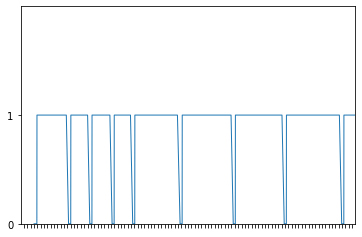

In [19]:
#FrametoTTL plot
fig, ax = plt.subplots()

ax.plot(frames_by_trial['Frame Timestamp'], frames_by_trial['FrametoTTL'], linewidth=1.0)
ax.set(xlim=(0, 100), xticks=np.arange(1,100),
       ylim=(0, 2), yticks=np.arange(0, 2))
ax.tick_params(labelbottom=False)

plt.show()

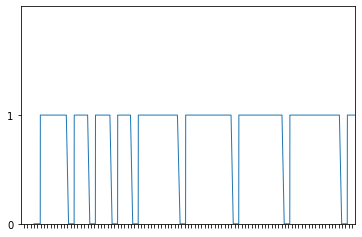

In [20]:
#SoundtoTTL plot
fig, ax = plt.subplots()

ax.plot(frames_by_trial['Frame Timestamp'], frames_by_trial['SoundtoTTL'], linewidth=1.0)
ax.set(xlim=(0, 100), xticks=np.arange(1,100),
       ylim=(0, 2), yticks=np.arange(0, 2))
ax.tick_params(labelbottom=False)

plt.show()

In [21]:
#This creates a dataframe of trial info
num_trials = list(range(1,len(trial_start+[1])))
trials_df = pd.DataFrame(data = {'trials': num_trials, 'trial start time': trial_start, 'trial end time': trial_end})
trials_df.set_index('trials')

,trial start time,trial end time
trials,,
1,0.000000,13.667304
2,14.315700,20.033903
3,20.648001,26.685803
4,27.310600,32.833803
5,33.462800,46.866903
6,47.611400,62.868802
7,63.488200,78.085303
8,78.729600,95.233503
9,95.884400,101.902003
